In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from collections import defaultdict

def find_TAM(sequence, TAM):
    TAM_pos = []
    
    # Iterate over the genome sequence, searching for TAM and extracting guide sequences
    for i in range(0, len(sequence) - len(TAM)):
        subseq = sequence[i:i + len(TAM)]
        if subseq == TAM:
            TAM_pos.append(i)
        elif subseq == Seq(TAM).reverse_complement():
            TAM_pos.append(i)
    return TAM_pos

def count_positions_within_ranges(positions, bin_size):
    counts = defaultdict(int)
    
    for pos in positions:
        bin_index = pos // bin_size
        counts[bin_index] += 1
    
    return counts

In [2]:
TTTAT_counts = []
GTTAC_counts = []
ATTAT_counts = []
CTTAC_counts = []
CTTAT_counts = []
GTTAT_counts = []

# Load E. coli genome file CP001509
genbank_file = r'C:\Users\Qi\Desktop\E. coli_TnpB\BL21_chromosome.gb'

for record in SeqIO.parse(genbank_file, "genbank"):
    sequence = record.seq
    
    # Process each TAM sequence and count positions within specified bins
    for TAM in ['TTTAT', 'GTTAC', 'ATTAT', 'CTTAC', 'CTTAT','GTTAT']:
        TAM_pos= find_TAM(sequence, TAM)
        counts = count_positions_within_ranges(TAM_pos, 20000)
                
        if TAM == 'TTTAT':
            TTTAT_counts = counts
            TTTAT_y=list(counts.values())
        if TAM == 'CTTAT':
            CTTAT_counts = counts
            CTTAT_y=list(counts.values())
        if TAM == 'ATTAT':
            ATTAT_counts = counts
            ATTAT_y=list(counts.values())
        if TAM == 'CTTAC':
            CTTAC_counts = counts
            CTTAC_y=list(counts.values())
        if TAM == 'GTTAC':
            GTTAC_counts = counts
            GTTAC_y=list(counts.values())
        if TAM == 'GTTAT':
            GTTAT_counts = counts
            GTTAT_y=list(counts.values())


       

In [33]:
circol_x=list(key + 0.5 for key in TTTAT_counts.keys())

In [17]:
print(sum(TTTAT_counts.values()))

15289


In [28]:
# Initialize total counts
total_counts = 0

# Dictionary to hold the counts of each TAM
TAM_counts = {
    'TTTAT': TTTAT_counts,
    'GTTAC': GTTAC_counts,
    'ATTAT': ATTAT_counts,
    'CTTAC': CTTAC_counts,
    'CTTAT': CTTAT_counts,
    'GTTAT': GTTAT_counts
}

# Iterate over the specified TAMs and calculate the total counts
for TAM in TAM_counts.keys():
    total_counts += sum(TAM_counts[TAM].values())  # Sum the values

# Print the total counts
print("Total target counts:", total_counts)


Total target counts: 56513


C:\Users\Qi\AppData\Local\Temp\ipykernel_14100\831468015.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Dark2")


done


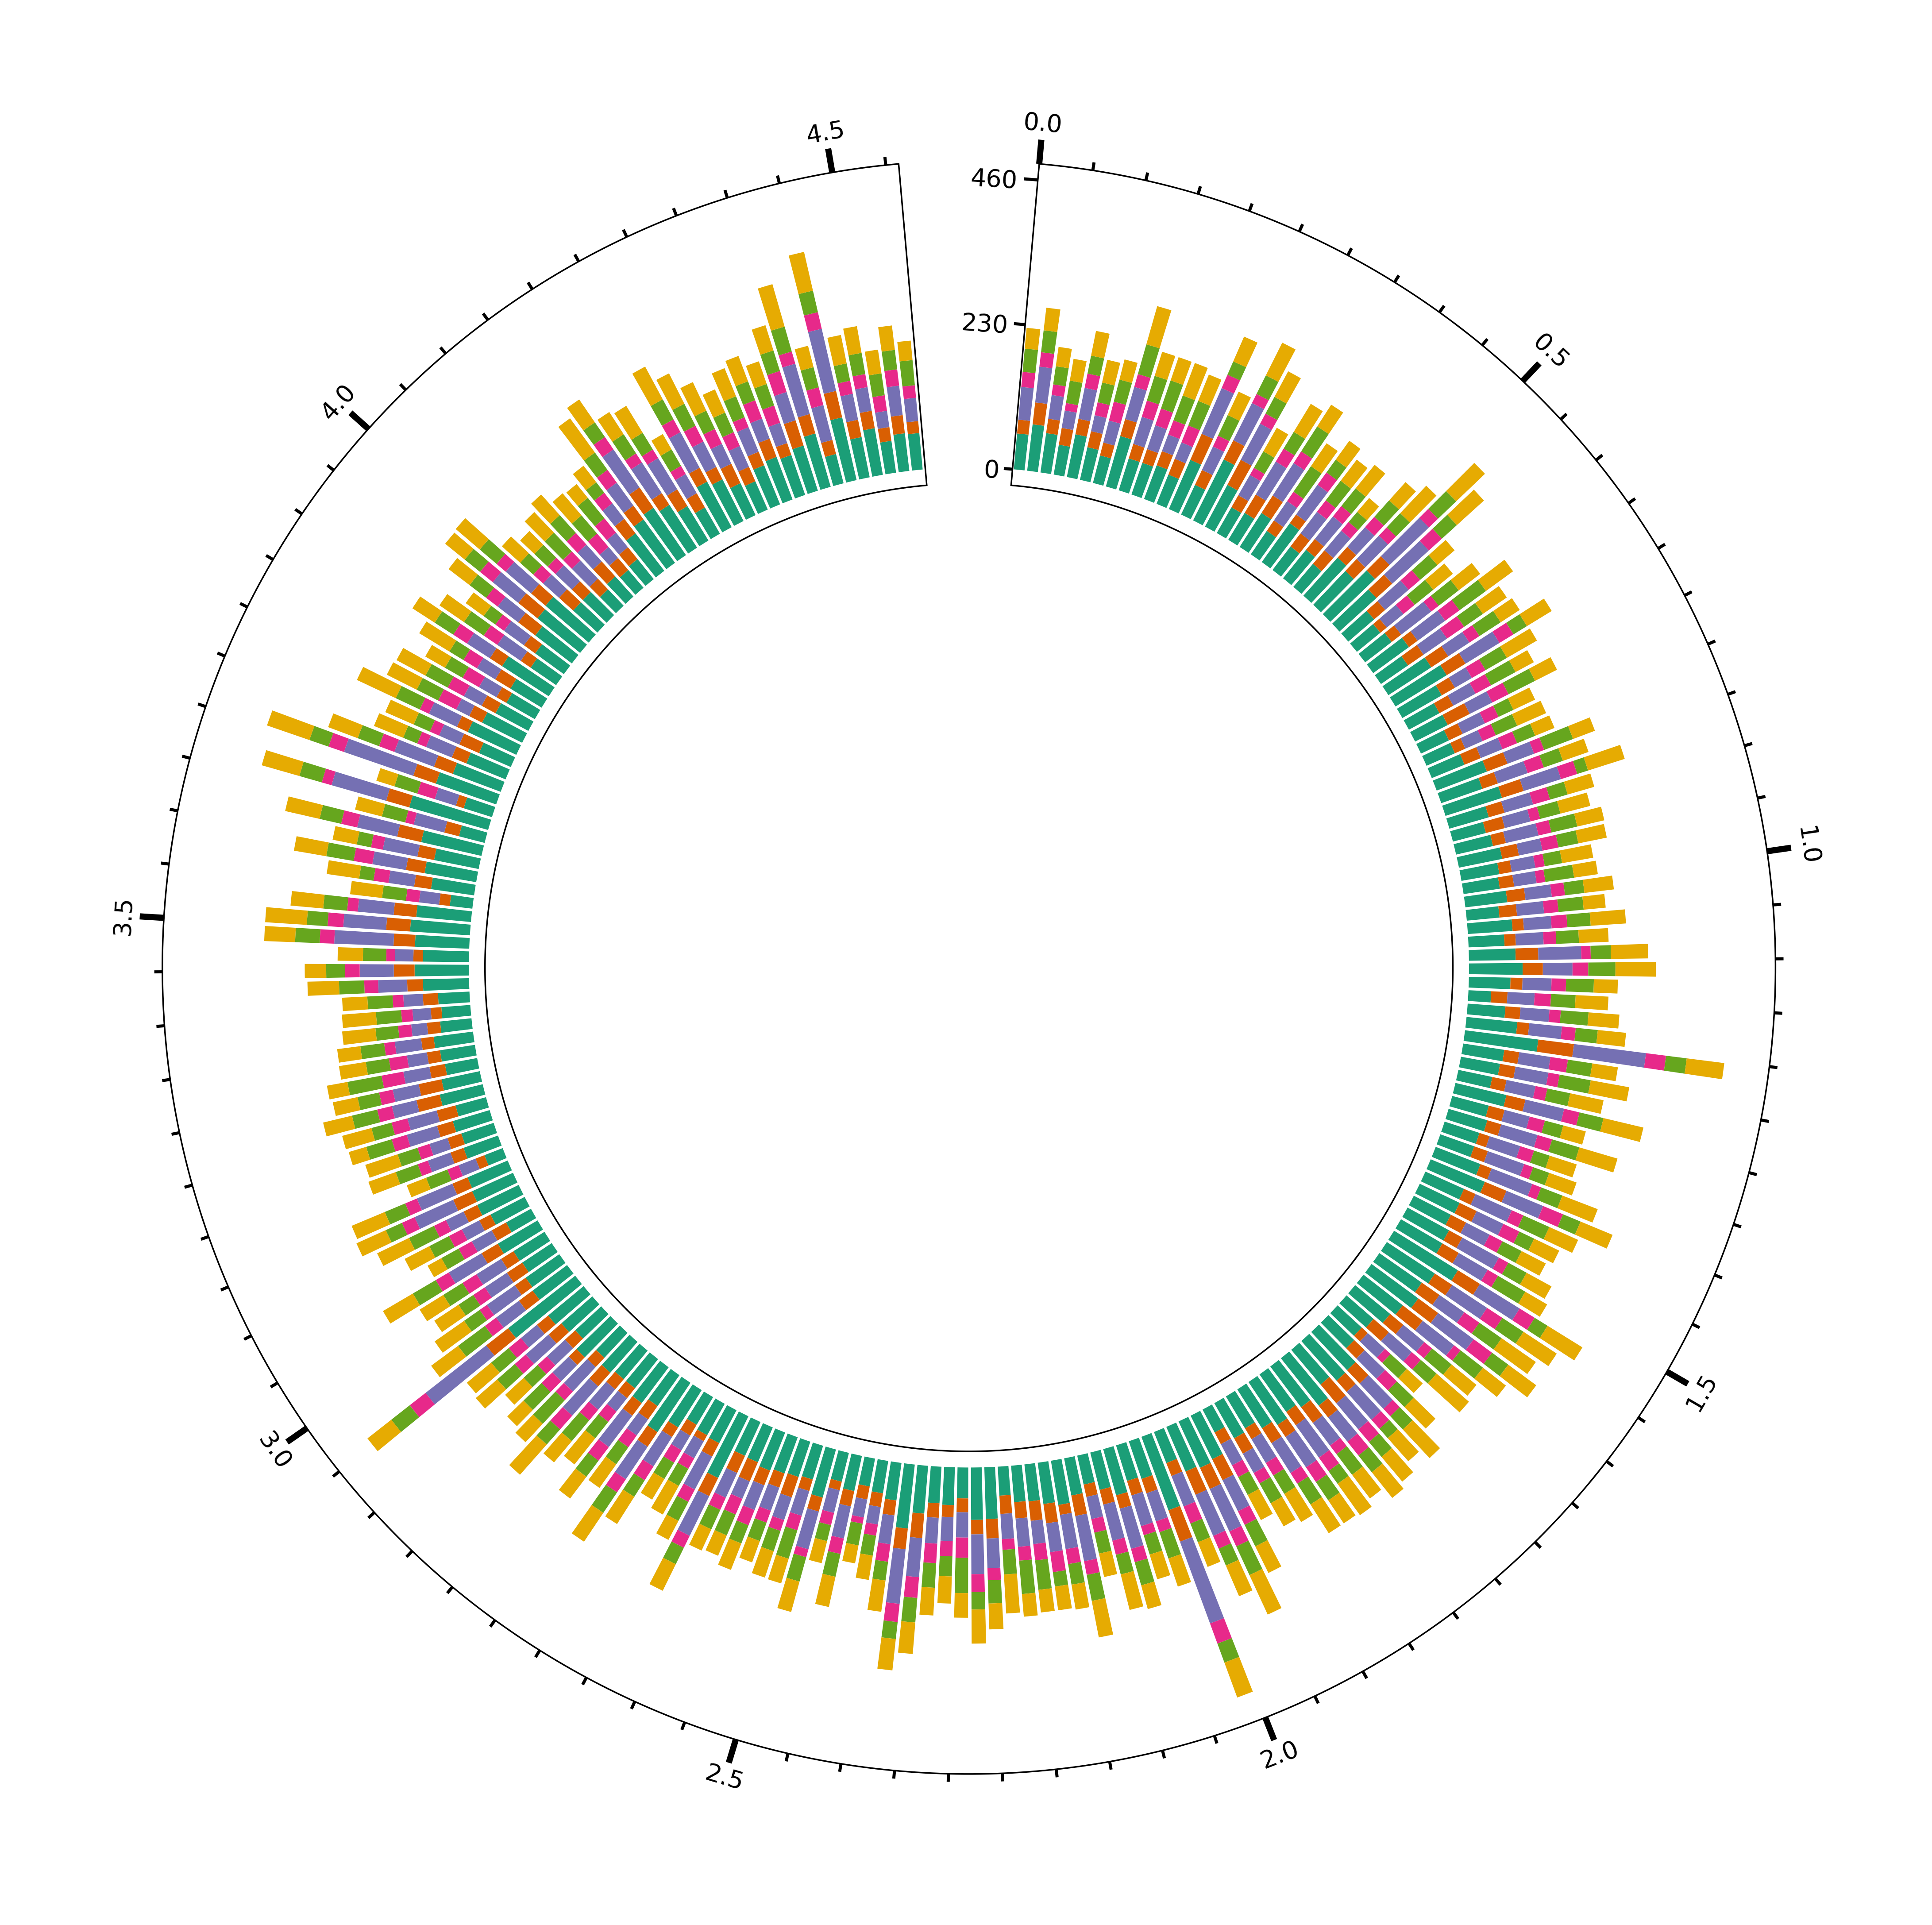

In [35]:
from pycirclize import Circos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch



# Define the chromosome sectors based on the length of circol_x
sectors = {"chromosome": len(TTTAT_counts)+0.1}


# Initialize Circos plot
circos = Circos(sectors, space=2,start=5, end=355, endspace=False)

# Create a colormap with 'Pastel1' colors
cmap = plt.cm.get_cmap("Dark2")

# Iterate over sectors in Circos
for sector in circos.sectors:
    
    
    # Add a track to the sector with specified parameters
    track1 = sector.add_track((60, 100), r_pad_ratio=0.1)
    
    labels = [f"{i*2/100:.1f}" for i in range(0,228,25)]

    
    line_properties = {'lw': 2}  # Set line width (lw)
    line_properties2 = {'lw': 1}  # Set line width (lw)
    track1.xticks(range(0,228,25), labels, tick_length=3, line_kws=line_properties)
    track1.xticks_by_interval(25/ 10, tick_length=1, show_label=False,line_kws=line_properties2)
    track1.axis()  # Add axis to the track
     # Create a colormap iterator to cycle through colors
    color_iter = iter(cmap.colors)
    
    # Plot stacked bars on the track using colormap colors
    stack_bottom = np.zeros(len(circol_x))  # Initialize bottom stack
    
    # Plot bars with colormap colors
    for data, color in zip([TTTAT_y, CTTAT_y, ATTAT_y, CTTAC_y, GTTAC_y, GTTAT_y], cmap.colors):
        track1.bar(circol_x, data, bottom=stack_bottom, color=color, vmin=0, vmax=460)  # Plot bar with assigned color and color range
        stack_bottom += data  # Update bottom stack for stacking next set of bars
        
    #track1.legend(handles=legend_handles, labels=legend_labels, loc='upper right', fontsize=8)
    track1.yticks(y=[0,230,460], side='left', labels=['0','230','460'], label_size=8, line_kws=line_properties2)


# Plot the Circos figure
circos.plotfig(dpi=500)
circos.savefig("example01.png", dpi=500)

handles = [
    Patch(color=cmap(0), label="TTTAT"),
    Patch(color=cmap(1), label="CTTAT"),
    Patch(color=cmap(2), label="ATTAT"),
    Patch(color=cmap(3), label="CTTAC"),
    Patch(color=cmap(4), label="GTTAC"),
    Patch(color=cmap(5), label="GTTAT"),

]
_ = circos.ax.legend(handles=handles, bbox_to_anchor=(0.43, 1), loc="best", fontsize=11)

# Print 'done' after plotting is completed
print('done')
   